로지스틱 회귀분석

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [33]:
x_data=np.array([
    [2,1],
    [3,2],
    [3,4],
    [5,5],
    [7,5],
    [2,5],
    [8,9],
    [9,10],
    [6,12],
    [9,2],
    [6,10],
    [2,4]
])
y_data = np.array([0,0,1,1,1,0,1,1,1,1,1,0])
labels=['fail','pass']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=2)


In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('before_accuracy',metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=['class 0','class 1']))

before_accuracy 0.6666666666666666
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         1
     class 1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

In [44]:
cancer=load_breast_cancer()
from sklearn.preprocessing import StandardScaler
model=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('before_accuracy',metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['class 0','class 1']))
y_test=y_test.tolist()
print(y_test.count(1))

before_accuracy 0.965034965034965
              precision    recall  f1-score   support

     class 0       0.96      0.94      0.95        54
     class 1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

89


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)
X_train,X_test,y_train,y_test = train_test_split(data_scaled,cancer.target,
                                                random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("StandardScaler_accuracy",metrics.accuracy_score(y_test,y_pred))

StandardScaler_accuracy 0.9790209790209791


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

[[4 1]
 [2 3]]


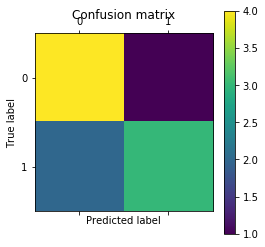

In [26]:
y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [49]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

wine_data=pd.read_csv('winequality-white.csv',delimiter=';',dtype=float)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


In [61]:
x_data=wine_data.iloc[:,0:-1]
y_data=wine_data.iloc[:,-1]
y_data=np.array([1 if i>=8 else 0 for i in y_data])
x_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [62]:
train_x, test_x, train_y, test_y=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [65]:
from sklearn.metrics import classification_report
log_reg=LogisticRegression()
log_reg.fit(train_x,train_y)
y_true,y_pred=test_y,log_reg.predict(test_x)
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1421
           1       0.00      0.00      0.00        49

    accuracy                           0.97      1470
   macro avg       0.48      0.50      0.49      1470
weighted avg       0.93      0.97      0.95      1470



C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
logit=sm.Logit(train_y,train_x).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.143100
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3417
Method:                           MLE   Df Model:                           10
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1179
Time:                        14:31:55   Log-Likelihood:                -490.55
converged:                       True   LL-Null:                       -556.12
Covariance Type:            nonrobust   LLR p-value:                 2.729e-23
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1153      0.138      0.835      0.404      -0.155       0.386
volatile acidity        -2.5585      1.092     -2.343      0.019      -4.699      -0.418
citric acid             -0.8329      0.941     -0.885      0.376      -2.678       1.012
residual sugar           0.0738      0.022      3.362      0.001       0.031       0.117
chlorides               -3.0146      7.500     -0.402      0.688     -17.714      11.684
free sulfur dioxide      0.0235      0.007      3.462      0.001       0.010       0.037
total sulfur dioxide    -0.0014      0.004     -0.411      0.681      -0.008       0.005
density                -16.2508      3.255     -4.992      0.000     -22.631      -9.871
pH                       0.6767      0.744      0.910      0.363      -0.781       2.134
sulphates                0.4109      0.713      0.577      0.564      -0.986       1.808
alcohol                  0.8842      0.098      8.987      0.000       0.691       1.077
========================================================================================
"""

In [70]:
print(np.exp(logit.params))

fixed acidity           1.122202e+00
volatile acidity        7.742073e-02
citric acid             4.347952e-01
residual sugar          1.076630e+00
chlorides               4.906419e-02
free sulfur dioxide     1.023754e+00
total sulfur dioxide    9.985557e-01
density                 8.756851e-08
pH                      1.967425e+00
sulphates               1.508200e+00
alcohol                 2.421044e+00
dtype: float64


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


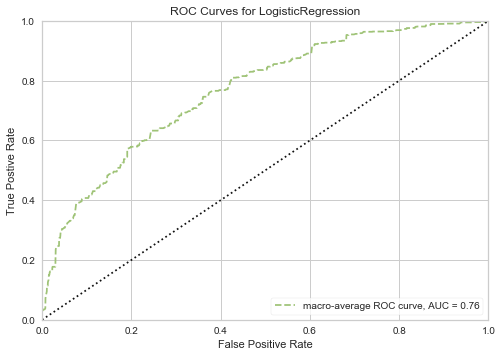

In [73]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(log_reg,classes=[0,1],micro=False,macro=True,per_class=False)
visualizer.fit(train_x,train_y)
visualizer.score(train_x,train_y)
visualizer.show()

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
X=[[0],[1],[2],[3]]
y=[0,0,1,1]
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [79]:
classifier=KNeighborsClassifier(n_neighbors=3,weights='distance',metric='euclidean')

In [80]:
training_points=[
    [0.5,0.2,0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]
training_labels=[0,1,1]
classifier.fit(training_points,training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [85]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.feature_names)
X=iris.data[:,:4]
y=iris.target


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

X=pd.DataFrame(X_scaled,columns=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [89]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

print(clf.score(x_test,y_test))

0.9333333333333333


In [90]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.9        1.        ]
0.9533333333333334
